### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("house_prices_cleaned.csv")
df=pd.DataFrame(df)

In [3]:
df

,Index,Title,Description,Amount(in rupees),location,Status,Transaction,Furnishing,Bathroom,Balcony,Ownership,BHK
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,thane,Ready to Move,Resale,Unfurnished,1,2,Freehold,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,thane,Ready to Move,Resale,Semi-Furnished,2,2,Freehold,2
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,thane,Ready to Move,Resale,Unfurnished,2,2,Freehold,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,thane,Ready to Move,Resale,Unfurnished,1,1,Freehold,1
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,thane,Ready to Move,Resale,Unfurnished,2,2,Co-operative Society,2
...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,6300000.0,zirakpur,Ready to Move,New Property,Semi-Furnished,3,3,Freehold,3
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,5500000.0,zirakpur,Ready to Move,Resale,Unfurnished,3,2,Freehold,3
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",7600000.0,zirakpur,Ready to Move,Resale,Furnished,3,2,Freehold,3
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,3000000.0,zirakpur,Ready to Move,Resale,Semi-Furnished,2,2,Freehold,2


### How many houses are present in different cities

##### 1.Manual Way using loop

In [4]:
city_count={}
for index, row in df.iterrows():
    city=row["location"]
    if city in city_count:
        city_count[city]+=1
    else:
        city_count[city]=1
for city, count in city_count.items():
    print(f"{city}: {count}")

thane: 1933
navi-mumbai: 718
nagpur: 714
mumbai: 1860
ahmedabad: 12750
bangalore: 24030
chennai: 10500
gurgaon: 20070
hyderabad: 12300
indore: 144
jaipur: 8490
kolkata: 22380
lucknow: 896
new-delhi: 27599
noida: 1281
pune: 2225
agra: 450
ahmadnagar: 30
allahabad: 180
aurangabad: 450
badlapur: 390
belgaum: 60
bhiwadi: 1050
bhiwandi: 90
bhopal: 121
bhubaneswar: 456
chandigarh: 1440
coimbatore: 720
dehradun: 990
durgapur: 150
ernakulam: 180
faridabad: 3840
ghaziabad: 931
goa: 1200
greater-noida: 4710
guntur: 270
guwahati: 750
gwalior: 150
haridwar: 180
jabalpur: 120
jamshedpur: 630
jodhpur: 60
kalyan: 600
kanpur: 780
kochi: 1050
kozhikode: 60
ludhiana: 150
madurai: 30
mangalore: 450
mohali: 1710
mysore: 180
nashik: 345
navsari: 30
nellore: 30
palakkad: 30
palghar: 510
panchkula: 360
patna: 780
pondicherry: 30
raipur: 510
rajahmundry: 90
ranchi: 1080
satara: 60
shimla: 60
siliguri: 390
solapur: 30
sonipat: 750
surat: 2370
thrissur: 210
tirupati: 90
trichy: 120
trivandrum: 210
udaipur: 120


##### Using inbuild function

In [5]:
df['location'].value_counts()

location
new-delhi      27599
bangalore      24030
kolkata        22380
gurgaon        20070
ahmedabad      12750
               ...  
nellore           30
pondicherry       30
navsari           30
palakkad          30
solapur           30
Name: count, Length: 81, dtype: int64

<Axes: xlabel='location'>

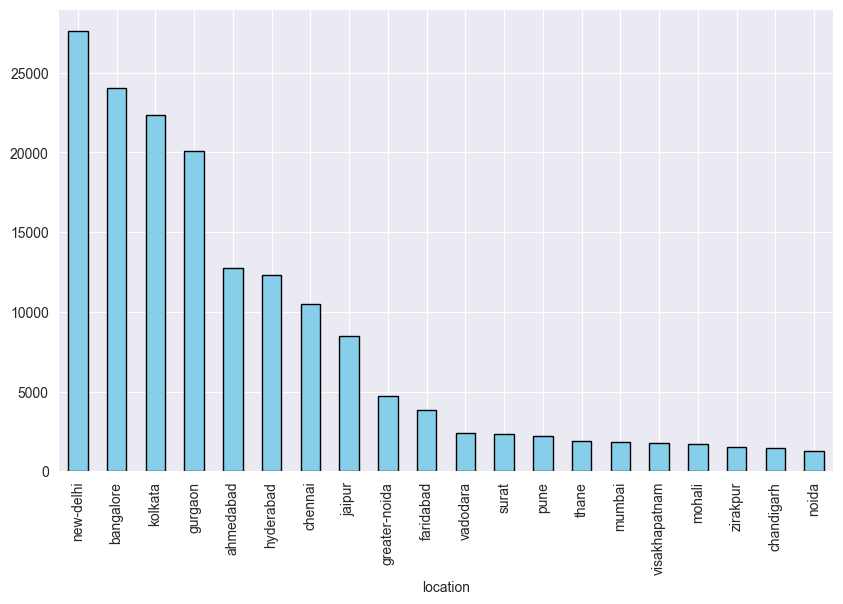

In [6]:
count_trans = df['location'].value_counts().nlargest(20)  ## shows the graph of largest 20 because of tho many values
plt.figure(figsize=(10, 6))
count_trans.plot(kind='bar', color='skyblue', edgecolor='black')

### How many houses are there in hyderabad having price above 6500000

##### manual way

In [7]:
count=0
for index,row in df.iterrows():
    if row['location'] == "hyderabad" and row["Amount(in rupees)"]>=6500000:
        count+=1
print(f'There are {count} houses available in hyderabad having price above 6500000.')

There are 8721 houses available in hyderabad having price above 6500000.


### Count of different type of transaction

In [8]:
count_trans={}
for index,row in df.iterrows():
    typ=row["Transaction"]
    if typ in count_trans:
        count_trans[typ]+=1
    else:
        count_trans[typ]=1
print("Different type of transactions are:")
for tpy,trans in count_trans.items():
    print(f"{tpy}: {trans}")

Different type of transactions are:
Resale: 144255
New Property: 42565
Other: 709
Rent/Lease: 2


### Compare using the bar chart

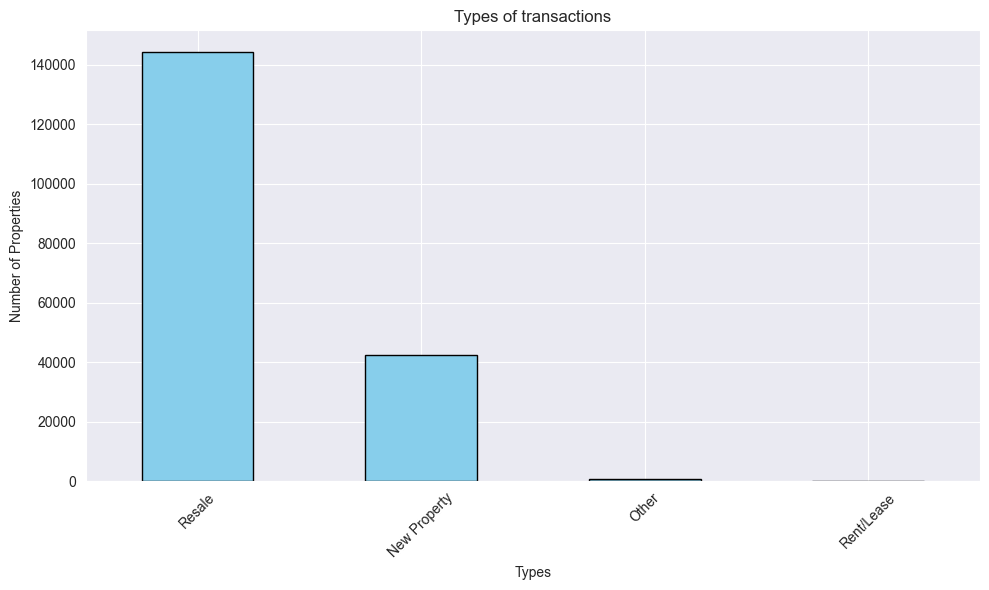

In [9]:
count_trans = df['Transaction'].value_counts()
plt.figure(figsize=(10, 6))
count_trans.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Types of transactions')
plt.xlabel('Types')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What is the distribution of house prices?
Goal: Understand the spread and central tendency of house prices.

Visualization: Histogram of Amount(in rupees).



<Axes: xlabel='Amount(in rupees)', ylabel='Count'>

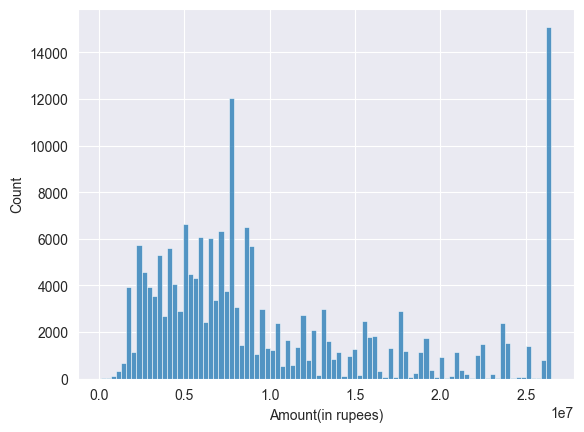

In [10]:
sns.histplot(x='Amount(in rupees)', data=df)

### how many houses are there above price 1cr

In [11]:
count=0
for index,row in df.iterrows():
    if row['Amount(in rupees)']>10000000:
        count+=1
print(f"There are {count} houses available above 1cr rupees.")

There are 64527 houses available above 1cr rupees.


### How many houses are there between 1cr and 1.5cr

In [12]:
count=0
for  index,row in df.iterrows():
    if row['Amount(in rupees)']>10000000 and row['Amount(in rupees)']<15000000:
        count+=1
print(f"There are {count} houses available between 1cr and 1.5cr rupees.")

There are 20628 houses available between 1cr and 1.5cr rupees.


### How does the price vary by number of BHKs?
Goal: Compare price trends across different BHK categories.

Visualization: Bar chart of Amount(in rupees) grouped by BHK.

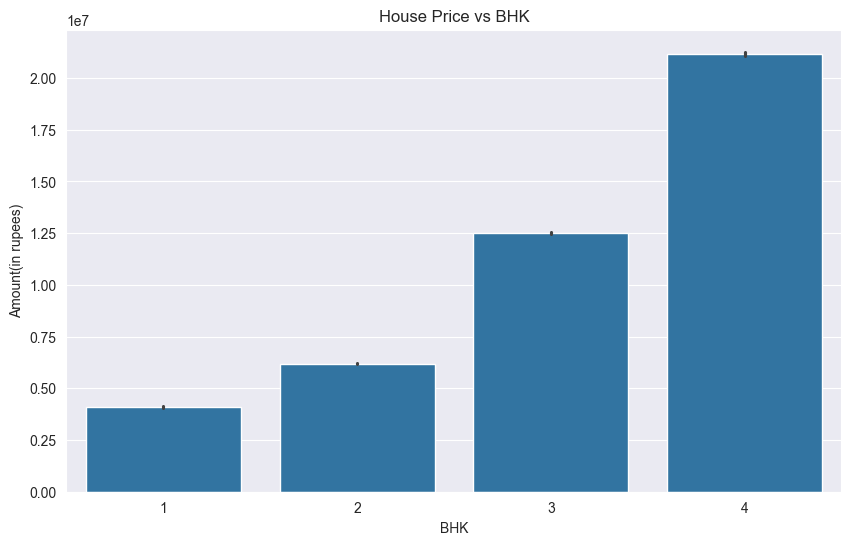

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='BHK', y='Amount(in rupees)', data=df)
plt.title('House Price vs BHK')
plt.show()


##### How many houses are there have 4 bhk and have price less than 1cr and present in Thane

In [14]:
count=0
for index,row in df.iterrows():
    if row['Amount(in rupees)']<10000000 and row["BHK"]==4 and row["location"]=="thane":
        count+=1
print(f"There are {count} houses available in Thane below 1cr rupees and have 4 BHK.")

There are 2 houses available in Thane below 1cr rupees and have 4 BHK.


#### number of houses available with different number of bedroom

In [15]:
cont_bed={}
for index,row in df.iterrows():
    cot=row["BHK"]
    if cot in cont_bed:
        cont_bed[cot]+=1
    else:
        cont_bed[cot]=1
for cot,count in cont_bed.items():
    print(f"{cot} BHK: {count} Houses available")


1 BHK: 12295 Houses available
2 BHK: 75508 Houses available
3 BHK: 81801 Houses available
4 BHK: 17927 Houses available


###  What is the average price by furnishing type?
Goal: Analyze if Furnishing (Unfurnished, Semi-Furnished) impacts price

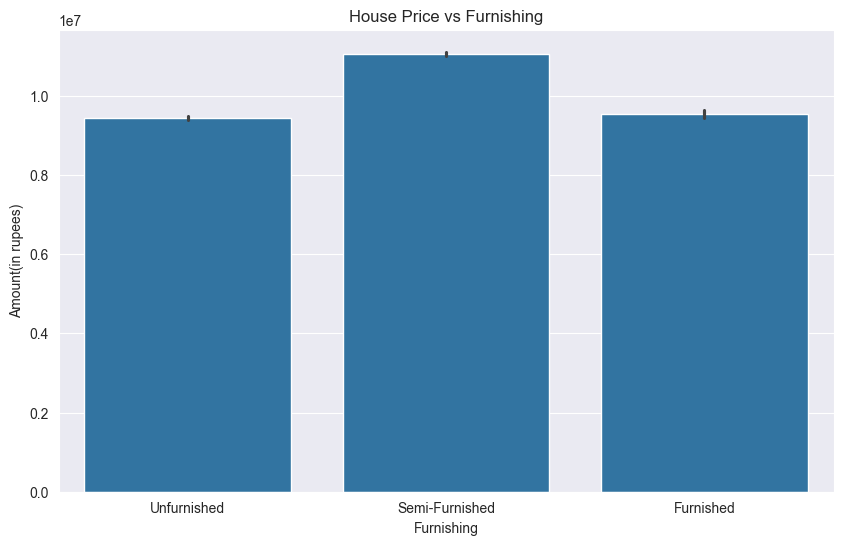

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Furnishing', y='Amount(in rupees)', data=df)
plt.title('House Price vs Furnishing')
plt.show()

##### What is the average price by furnishing type?

In [17]:
avg_price_by_furnishing = df.groupby('Furnishing')['Amount(in rupees)'].mean().sort_values(ascending=False)
print(avg_price_by_furnishing)

Furnishing
Semi-Furnished    1.106196e+07
Furnished         9.543661e+06
Unfurnished       9.430111e+06
Name: Amount(in rupees), dtype: float64


#### how many houses having price 2cr and 3 bhk and Unfurnished

In [18]:
count=0
for index,row in df.iterrows():
    if row["Amount(in rupees)"]==20000000 and row["BHK"]==3 and row["Furnishing"]=="Unfurnished":
        count+=1
print(f"There are {count} 3BHK houses available in Unfurnished and having price 2cr rupees.")

There are 58 3BHK houses available in Unfurnished and having price 2cr rupees.


### Is there a correlation between the number of bathrooms and price?
Goal: Determine if more bathrooms lead to higher prices.


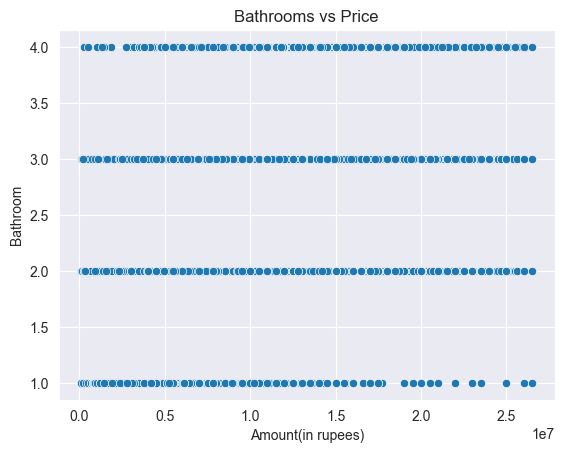

In [19]:
sns.scatterplot(x='Amount(in rupees)', y='Bathroom', data=df)
plt.title('Bathrooms vs Price')
plt.show()

In [20]:
correlation=df["Amount(in rupees)"].corr(df["Bathroom"])
print(f"Correlation between bathrooms and price: {correlation:.2f}")

Correlation between bathrooms and price: 0.66


### Which locations have the highest average prices?
Goal: Identify top locations in terms of property value.

Visualization: Bar Plot of average Amount(in rupees) by location.

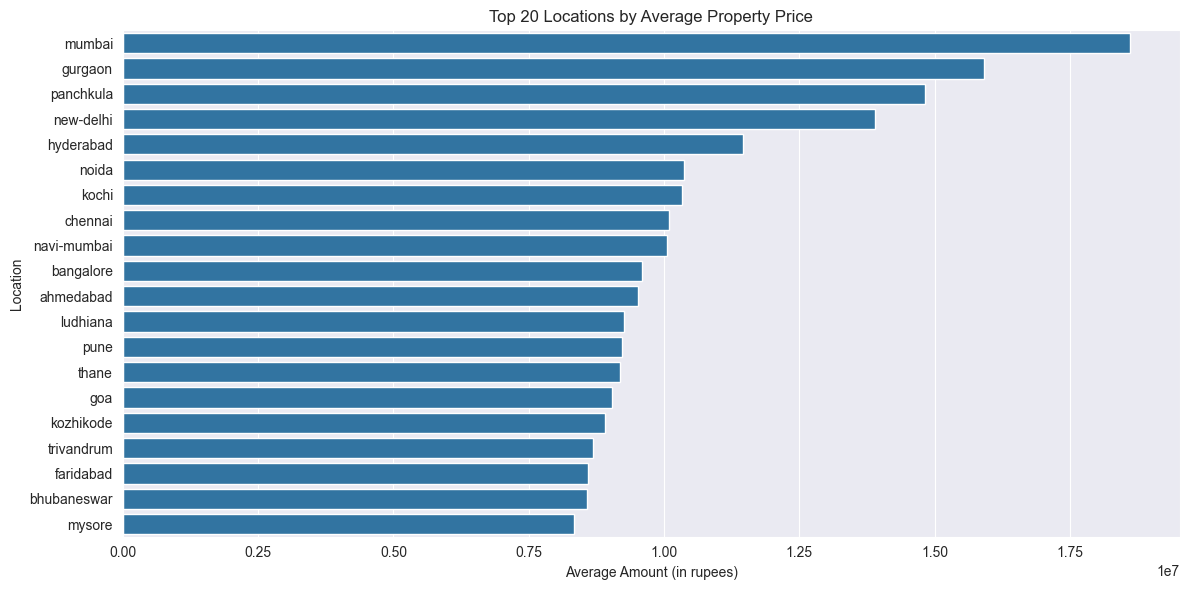

In [21]:
avg_price=df.groupby('location')['Amount(in rupees)'].mean().sort_values(ascending=False)
top=avg_price.head(20)## too many values this is for top 20 values
plt.figure(figsize=(12, 6))
sns.barplot(x=top.values, y=top.index)
plt.title("Top 20 Locations by Average Property Price")
plt.xlabel("Average Amount (in rupees)")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

### How many properties are available by status?
Goal: See the proportion of Ready to Move vs. other statuses.


In [22]:
count={}
for index,row in df.iterrows():
    typ=row["Status"]
    if typ in count:
            count[typ]+=1
    else:
        count[typ]=1
for typ,count in count.items():
    print(f"There are {count} houses available in {typ}")


There are 186916 houses available in Ready to Move
There are 615 houses available in Under_construction


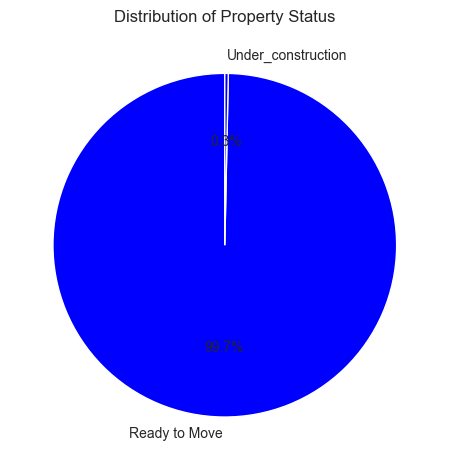

In [23]:
count = df["Status"].value_counts()
count.plot(kind='pie', colors=['blue'] * len(count), autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Distribution of Property Status')
plt.tight_layout()
plt.show()


### What is the relationship between balconies and price?
Goal: Check if number of balconies affects pricing.


In [24]:
correlation=df["Amount(in rupees)"].corr(df["Balcony"])
print(f"Correlation between Balcony and price: {correlation:.2f}")

Correlation between Balcony and price: 0.31


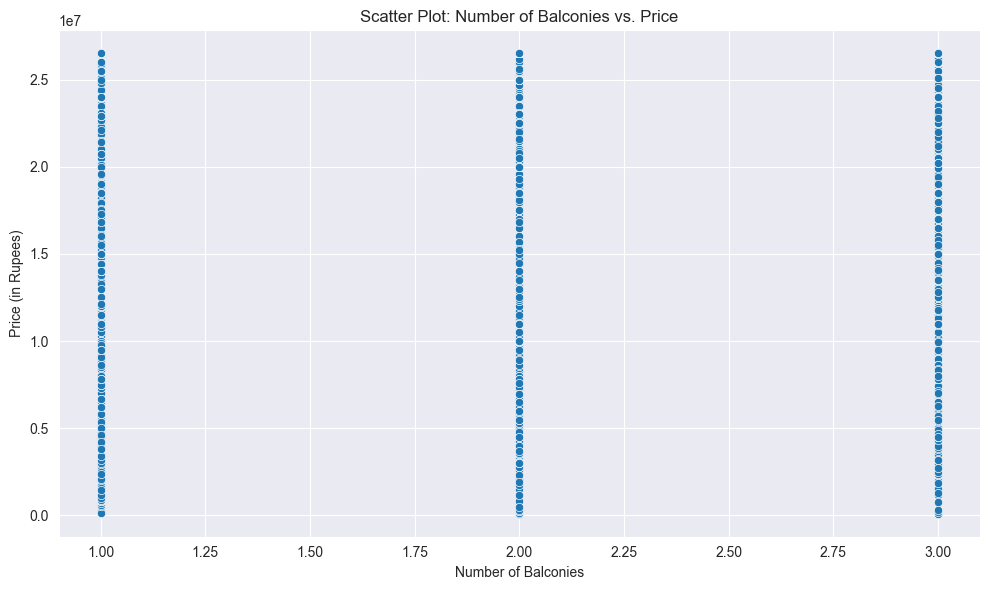

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balcony', y='Amount(in rupees)', data=df)
plt.title('Scatter Plot: Number of Balconies vs. Price')
plt.xlabel('Number of Balconies')
plt.ylabel('Price (in Rupees)')
plt.tight_layout()
plt.show()